# Analysis of the text2video benchmark results

In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df = pd.concat(dfs, ignore_index=True)
exp1_df['energy_generate_gpu'] = exp1_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df['runs'] = 5
exp1_df['cpu_count'] = 8
exp1_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df['gpu_count'] = 1
exp1_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [ ]:
exp1_df

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,num_frames,runs,out_video,out_csv,fps,...,downscaled_width,generate_steps,denoise_steps,denoise_strength,decode_timestep,image_cond_noise_scale,cpu_count,cpu_model,gpu_count,gpu_model
0,Mochi-1-preview,274.606496,0.006682,0.002900,An underwater coral reef with colorful fish,84.0,5,exp_Mochi-1-preview_output_prompt6_2025-06-18_...,exp_Mochi-1-preview_results_prompt6_2025-06-18...,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,CogVideoX-5b,123.398941,0.002911,0.001304,A serene beach at sunrise with gentle waves,49.0,5,exp_CogVideoX-5b_output_prompt2_2025-06-18_12-...,exp_CogVideoX-5b_results_prompt2_2025-06-18_12...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,CogVideoX-5b,123.632510,0.002987,0.001306,A medieval castle on a cliff during a thunders...,49.0,5,exp_CogVideoX-5b_output_prompt7_2025-06-18_13-...,exp_CogVideoX-5b_results_prompt7_2025-06-18_13...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,WAN2.1-T2V-1.3B-Diffusers,102.735611,0.001879,0.001086,A serene beach at sunrise with gentle waves,81.0,5,exp_WAN2.1-T2V-1.3B-Diffusers_output_prompt2_2...,exp_WAN2.1-T2V-1.3B-Diffusers_results_prompt2_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,AnimateDiff,0.703856,0.000016,0.000008,A peaceful rural village in spring with bloomi...,NaN,5,NaN,exp_AnimateDiff_results_prompt8_2025-06-18_12-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,CogVideoX-2b,51.000796,0.001338,0.000539,A dense jungle with exotic animals and mist,49.0,5,exp_CogVideoX-2b_output_prompt3_2025-06-19_08-...,exp_CogVideoX-2b_results_prompt3_2025-06-19_08...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
66,WAN2.1-T2V-14B-Diffusers,490.547817,0.010802,0.005179,"A futuristic cityscape at night, neon lights r...",81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt1_20...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt1_2...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
67,WAN2.1-T2V-14B-Diffusers,489.694768,0.006122,0.005170,A mystical forest with glowing mushrooms and f...,81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt10_2...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
68,LTX-Video-0.9.7-dev,9.878693,0.000228,0.000105,A cyberpunk hacker in a dark alleyway with hol...,121.0,5,exp_LTX-Video-0.9.7-dev_output_prompt5_2025-06...,exp_LTX-Video-0.9.7-dev_results_prompt5_2025-0...,24.0,...,448.0,30.0,10.0,0.4,0.05,0.025,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [ ]:
exp1_df['model_name'].unique()

array(['Mochi-1-preview', 'CogVideoX-5b', 'WAN2.1-T2V-1.3B-Diffusers',
       'AnimateDiff', 'CogVideoX-2b', 'LTX-Video-0.9.7-dev',
       'WAN2.1-T2V-14B-Diffusers'], dtype=object)

In [ ]:
exp1_df[['name_csv', 'model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram', 'prompt']].sort_values(
    by=['model_name', 'prompt'])

,name_csv,model_name,duration_generate,energy_generate_gpu,energy_generate_cpu,energy_generate_ram,prompt
38,exp_AnimateDiff_results_prompt5_2025-06-18_12-...,AnimateDiff,0.687965,0.000111,0.000015,0.000008,A cyberpunk hacker in a dark alleyway with hol...
56,exp_AnimateDiff_results_prompt3_2025-06-18_12-...,AnimateDiff,0.686887,0.000112,0.000020,0.000008,A dense jungle with exotic animals and mist
48,exp_AnimateDiff_results_prompt1_2025-06-18_12-...,AnimateDiff,0.687201,0.000112,0.000015,0.000008,"A futuristic cityscape at night, neon lights r..."
7,exp_AnimateDiff_results_prompt4_2025-06-18_12-...,AnimateDiff,0.697821,0.000110,0.000024,0.000008,A majestic dragon flying over snowy mountains
43,exp_AnimateDiff_results_prompt7_2025-06-18_12-...,AnimateDiff,0.693765,0.000113,0.000022,0.000008,A medieval castle on a cliff during a thunders...
...,...,...,...,...,...,...,...
67,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,WAN2.1-T2V-14B-Diffusers,489.694768,0.093814,0.006122,0.005170,A mystical forest with glowing mushrooms and f...
62,exp_WAN2.1-T2V-14B-Diffusers_results_prompt8_2...,WAN2.1-T2V-14B-Diffusers,489.884060,0.093803,0.010051,0.005172,A peaceful rural village in spring with bloomi...
22,exp_WAN2.1-T2V-14B-Diffusers_results_prompt2_2...,WAN2.1-T2V-14B-Diffusers,489.559194,0.093766,0.008953,0.005169,A serene beach at sunrise with gentle waves
50,exp_WAN2.1-T2V-14B-Diffusers_results_prompt9_2...,WAN2.1-T2V-14B-Diffusers,489.528463,0.093777,0.010649,0.005168,A spaceship approaching a giant alien planet


In [ ]:
exp1_df['steps'] = exp1_df.apply(
    lambda row: 64 if row['model_name'] == 'Mochi-1-preview' else
    60 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    60 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    4 if row['model_name'] == 'AnimateDiff' else
    30 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['steps'],
    axis=1
)

exp1_df['height'] = exp1_df.apply(
    lambda row: 480 if row['model_name'] == 'Mochi-1-preview' else
     480 if row['model_name'] == 'CogVideoX-5b' else
     480 if row['model_name'] == 'CogVideoX-2b' else
    480 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    480 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    512 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['height'],
    axis=1
)

exp1_df['width'] = exp1_df.apply(
    lambda row: 848 if row['model_name'] == 'Mochi-1-preview' else 
     720 if row['model_name'] == 'CogVideoX-5b' else
     720 if row['model_name'] == 'CogVideoX-2b' else
    832 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    832 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    704 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['width'],
    axis=1
)

exp1_df['fps'] = exp1_df.apply(
    lambda row: 10 if row['model_name'] == 'AnimateDiff' else
    row['fps'],
    axis=1
)

exp1_df['num_frames'] = exp1_df.apply(
    lambda row: 16 if row['model_name'] == 'AnimateDiff' else
    row['num_frames'],
    axis=1
)

exp1_df['model_hf_page'] = exp1_df.apply(
    lambda row: f"https://huggingface.co/ByteDance/AnimateDiff-Lightning" if row['model_name'] == 'AnimateDiff' else
    f"https://huggingface.co/THUDM/CogVideoX-5b" if row['model_name'] == 'CogVideoX-5b' else
    f"https://huggingface.co/THUDM/CogVideoX-2b" if row['model_name'] == 'CogVideoX-2b' else
    f"https://huggingface.co/Lightricks/LTX-Video-0.9.7-dev" if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    f"https://huggingface.co/genmo/mochi-1-preview" if row['model_name'] == 'Mochi-1-preview' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    None,
    axis=1
)

In [ ]:
exp1_df[['model_name', 'steps', 'height', 'width', 'num_frames', 'fps', 'model_hf_page']].drop_duplicates().sort_values(
    by=['model_name']
)

,model_name,steps,height,width,num_frames,fps,model_hf_page
4,AnimateDiff,4.0,512,512,16.0,10.0,https://huggingface.co/ByteDance/AnimateDiff-L...
5,CogVideoX-2b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-2b
1,CogVideoX-5b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-5b
13,LTX-Video-0.9.7-dev,30.0,512,704,121.0,24.0,https://huggingface.co/Lightricks/LTX-Video-0....
0,Mochi-1-preview,64.0,480,848,84.0,30.0,https://huggingface.co/genmo/mochi-1-preview
3,WAN2.1-T2V-1.3B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-...
19,WAN2.1-T2V-14B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-D...


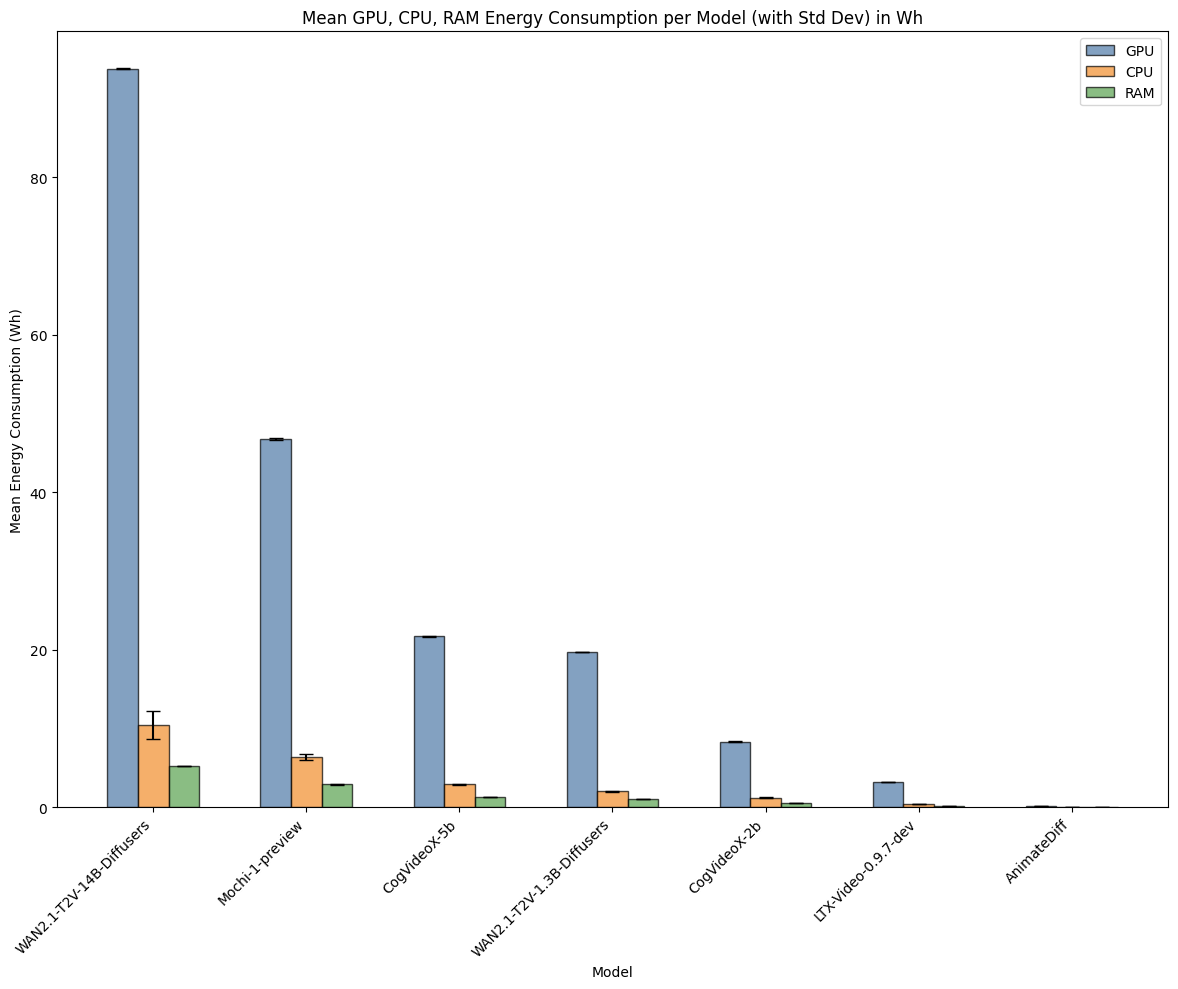

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélection des colonnes utiles
exp1_df_copy = exp1_df.copy()
exp1_df_copy['energy_generate_gpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_gpu'] + row['energy_upsample_gpu'] + row['energy_denoise_gpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_gpu'],
    axis=1
)
exp1_df_copy['energy_generate_cpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_cpu'] + row['energy_upsample_cpu'] + row['energy_denoise_cpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_cpu'],
    axis=1
)
exp1_df_copy['energy_generate_ram'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_ram'] + row['energy_upsample_ram'] + row['energy_denoise_ram']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_ram'],
    axis=1
)
df = exp1_df_copy[['model_name', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram']]

# Grouper : moyenne et écart-type
grouped_mean = df.groupby("model_name").mean(numeric_only=True)
grouped_std = df.groupby("model_name").std(numeric_only=True)

# Conversion en Wh (multiplication par 1000)
grouped_mean *= 1000
grouped_std *= 1000

# Fusionner pour trier
grouped = grouped_mean.join(grouped_std, lsuffix='_mean', rsuffix='_std')

# Trier par consommation GPU moyenne décroissante
grouped = grouped.sort_values(by='energy_generate_gpu_mean', ascending=False).reset_index()

# Préparer données
models = grouped["model_name"]
gpu_mean = grouped["energy_generate_gpu_mean"]
cpu_mean = grouped["energy_generate_cpu_mean"]
ram_mean = grouped["energy_generate_ram_mean"]

gpu_std = grouped["energy_generate_gpu_std"]
cpu_std = grouped["energy_generate_cpu_std"]
ram_std = grouped["energy_generate_ram_std"]

# Bar plot
bar_width = 0.2
x = range(len(models))

plt.figure(figsize=(12, 10))

plt.bar([p - bar_width for p in x], gpu_mean, yerr=gpu_std, width=bar_width,
        label="GPU", color="#4E79A7", alpha=0.7, edgecolor="black", capsize=5)
plt.bar(x, cpu_mean, yerr=cpu_std, width=bar_width,
        label="CPU", color="#F28E2B", alpha=0.7, edgecolor="black", capsize=5)
plt.bar([p + bar_width for p in x], ram_mean, yerr=ram_std, width=bar_width,
        label="RAM", color="#59A14F", alpha=0.7, edgecolor="black", capsize=5)

# Labels et légende
plt.xlabel("Model")
plt.ylabel("Mean Energy Consumption (Wh)")
plt.title("Mean GPU, CPU, RAM Energy Consumption per Model (with Std Dev) in Wh")
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
grouped.sort_values(by='model_name')

,model_name,energy_generate_gpu_mean,energy_generate_cpu_mean,energy_generate_ram_mean,energy_generate_gpu_std,energy_generate_cpu_std,energy_generate_ram_std
6,AnimateDiff,0.111867,0.017530,0.008398,0.000886,0.003239,0.000090
4,CogVideoX-2b,8.322930,1.208137,0.545836,0.036992,0.092664,0.007790
2,CogVideoX-5b,21.706856,2.913941,1.308462,0.034711,0.062232,0.005288
5,LTX-Video-0.9.7-dev,3.186758,0.411317,0.193303,0.006074,0.023041,0.000509
1,Mochi-1-preview,46.769779,6.398529,2.893315,0.131912,0.400536,0.031207
3,WAN2.1-T2V-1.3B-Diffusers,19.733828,1.981487,1.085782,0.011740,0.050821,0.000619
0,WAN2.1-T2V-14B-Diffusers,93.828618,10.472340,5.173742,0.044354,1.780398,0.004273


In [ ]:
# sort by model, prompt
save_df = exp1_df[['model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu',
       'energy_generate_ram', 'height', 'width', 'num_frames', 'fps', 'steps', 'prompt', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model',  'runs', 'warmup', 'model_hf_page', 
       'guidance_scale', 'negative_prompt', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'duration_upsample',
       'duration_denoise', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale' ]]
save_df = save_df.sort_values(by=['model_name', 'prompt']).reset_index(drop=True)
SAVE_DIR = '/fsx/jdelavande/benchlab/videos'
save_df.to_csv(os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'), index=False)

In [ ]:
from huggingface_hub import HfApi, HfFolder
import os

api = HfApi()
repo_id = "jdelavande/benchlab-text2video-energy-benchmark"

api.create_repo(repo_id, repo_type="dataset", exist_ok=True)

api.upload_file(
    path_or_fileobj=os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'),
    path_in_repo='text2video_energy_benchmark.csv',
    repo_id=repo_id,
    repo_type='dataset',
    token=HfFolder.get_token()
)


CommitInfo(commit_url='https://huggingface.co/datasets/jdelavande/benchlab-text2video-energy-benchmark/commit/1886822bbd226c536dcc5f174625d1547e9a652e', commit_message='Upload text2video_energy_benchmark.csv with huggingface_hub', commit_description='', oid='1886822bbd226c536dcc5f174625d1547e9a652e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jdelavande/benchlab-text2video-energy-benchmark', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jdelavande/benchlab-text2video-energy-benchmark'), pr_revision=None, pr_num=None)

## Push to hub video dataset

In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp2_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df2 = pd.concat(dfs, ignore_index=True)
exp1_df2['energy_generate_gpu'] = exp1_df2.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df2.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df2['runs'] = 5
exp1_df2['cpu_count'] = 8
exp1_df2['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df2['gpu_count'] = 1
exp1_df2['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp3_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df3 = pd.concat(dfs, ignore_index=True)
exp1_df3['energy_generate_gpu'] = exp1_df3.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df3.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df3['runs'] = 5
exp1_df3['cpu_count'] = 8
exp1_df3['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df3['gpu_count'] = 1
exp1_df3['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [ ]:
exp1_df_all = pd.concat([exp1_df, exp1_df2, exp1_df3], ignore_index=True)

In [ ]:
video_df = exp1_df_all.copy()

In [54]:
video_df['out_video'] = video_df.apply(
    lambda row: f"/fsx/jdelavande/benchlab/videos/data/text2video_dataset/{row['out_video']}" if pd.notnull(row['out_video']) else f"/fsx/jdelavande/benchlab/videos/data/text2video_dataset/{row['out_gif']}",
    axis=1
)

In [56]:
import os
import shutil
import pandas as pd

# === CONFIG ===
# Dossier d'origine (où sont tes fichiers exp_*.mp4 ou exp_*.gif)
source_dir = "/fsx/jdelavande/benchlab/videos/data/"

# Dossier cible pour le dataset final
target_dir = "/fsx/jdelavande/benchlab/videos/data/text2video_dataset"
os.makedirs(target_dir, exist_ok=True)

# === 1) Copier les fichiers qui commencent par 'exp_' ===
copied_files = []

for filename in os.listdir(source_dir):
    if filename.startswith("exp") and (filename.endswith(".mp4") or filename.endswith(".gif")):
        src = os.path.join(source_dir, filename)
        dst = os.path.join(target_dir, filename)
        shutil.copy2(src, dst)
        copied_files.append(filename)

print(f"✅ Copié {len(copied_files)} fichiers vers {target_dir}")

✅ Copié 91 fichiers vers /fsx/jdelavande/benchlab/videos/data/text2video_dataset


In [60]:
import pandas as pd

# Sélectionne les colonnes utiles et renomme
df = video_df[['out_video', 'prompt', 'model_name']].rename(
    columns={'out_video': 'file_name', 'model_name': 'model'}
)

# Optionnel : si tes chemins sont absolus, mets juste le nom de fichier
df['file_name'] = df['file_name'].apply(lambda x: os.path.basename(x))

# Sauvegarde dans ton dossier avec les vidéos
df.to_csv('/fsx/jdelavande/benchlab/videos/data/text2video_dataset/metadata.csv', index=False)


In [61]:
from huggingface_hub import HfApi

api = HfApi()
REPO = "jdelavande/text2video-energy-benchmark-generated-videos"

api.create_repo(REPO, repo_type="dataset", exist_ok=True)

api.upload_folder(
    folder_path="/fsx/jdelavande/benchlab/videos/data/text2video_dataset",
    repo_id=REPO,
    repo_type="dataset"
)


exp2_AnimateDiff_output_prompt1_2025-06-20_11-29-11.gif: 100%|██████████| 2.50M/2.50M [00:00<00:00, 17.1MB/s]
exp2_AnimateDiff_output_prompt2_2025-06-20_11-29-43.gif: 100%|██████████| 2.10M/2.10M [00:00<00:00, 19.5MB/s]
exp2_CogVideoX-2b_output_prompt1_2025-06-20_11-27-59.mp4: 100%|██████████| 730k/730k [00:00<00:00, 6.45MB/s]
exp2_CogVideoX-2b_output_prompt2_2025-06-20_11-29-16.mp4: 100%|██████████| 505k/505k [00:00<00:00, 13.2MB/s]
exp2_CogVideoX-5b_output_prompt1_2025-06-20_11-29-11.mp4: 100%|██████████| 596k/596k [00:00<00:00, 4.61MB/s]
exp2_CogVideoX-5b_output_prompt2_2025-06-20_11-31-47.mp4: 100%|██████████| 515k/515k [00:00<00:00, 8.23MB/s]
exp2_LTX-Video-0.9.7-dev_output_prompt1_2025-06-20_11-33-53.mp4: 100%|██████████| 292k/292k [00:00<00:00, 5.96MB/s]
exp2_LTX-Video-0.9.7-dev_output_prompt2_2025-06-20_11-34-45.mp4: 100%|██████████| 216k/216k [00:00<00:00, 2.40MB/s]
exp2_Mochi-1-preview_output_prompt1_2025-06-20_11-22-00.mp4: 100%|██████████| 363k/363k [00:00<00:00, 6.87MB/s]


CommitInfo(commit_url='https://huggingface.co/datasets/jdelavande/text2video-energy-benchmark-generated-videos/commit/bc2575a96da5f0f3c43d0f18fc5c2a6e4bf49905', commit_message='Upload folder using huggingface_hub', commit_description='', oid='bc2575a96da5f0f3c43d0f18fc5c2a6e4bf49905', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jdelavande/text2video-energy-benchmark-generated-videos', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jdelavande/text2video-energy-benchmark-generated-videos'), pr_revision=None, pr_num=None)

In [75]:
4096*2.68e12/1.15e14

95.45460869565217

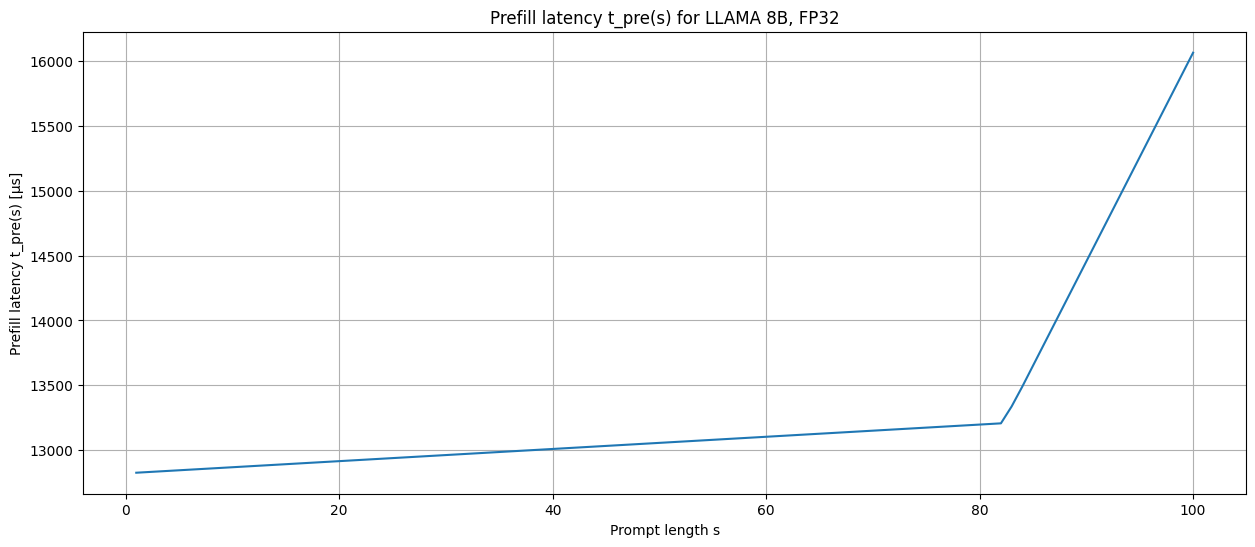

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for LLAMA 8B, FP32
h = 4096
bw = 4  # bytes per weight, FP32
F_max = 6.7e13  # FLOP/s (67 TFLOPS)
B_max = 3.35e12  # Bytes/s (3.35 TB/s)
N = 32  # number of layers, for example

# Define s range
s = np.linspace(1, 4_000, 4_000)
s = np.linspace(1, 100, 00)

# Q,K,V,Output proj: 4 terms
cmp_qkv = s * h**2 / F_max
mem_qkv = (2 * s * h + h**2) * bw / B_max
qkv = np.maximum(cmp_qkv, mem_qkv)

# QK^T, Softmax*V: 2 terms
cmp_attn = s**2 * h / F_max
mem_attn = (s**2 + s * h) * bw / B_max
attn = np.maximum(cmp_attn, mem_attn)

# FFN (1,2): 4 terms
cmp_ffn = 4 * s * h**2 / F_max
mem_ffn = (5 * s * h + 4 * h**2) * bw / B_max
ffn = np.maximum(cmp_ffn, mem_ffn)

# Total prefill latency
t_pre = N * (4 * qkv + 2 * attn + 4 * ffn)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(s, t_pre * 1e6)  # convert s to microseconds
plt.xlabel("Prompt length s")
plt.ylabel("Prefill latency t_pre(s) [µs]")
plt.title("Prefill latency t_pre(s) for LLAMA 8B, FP32")
plt.grid(True)
plt.show()


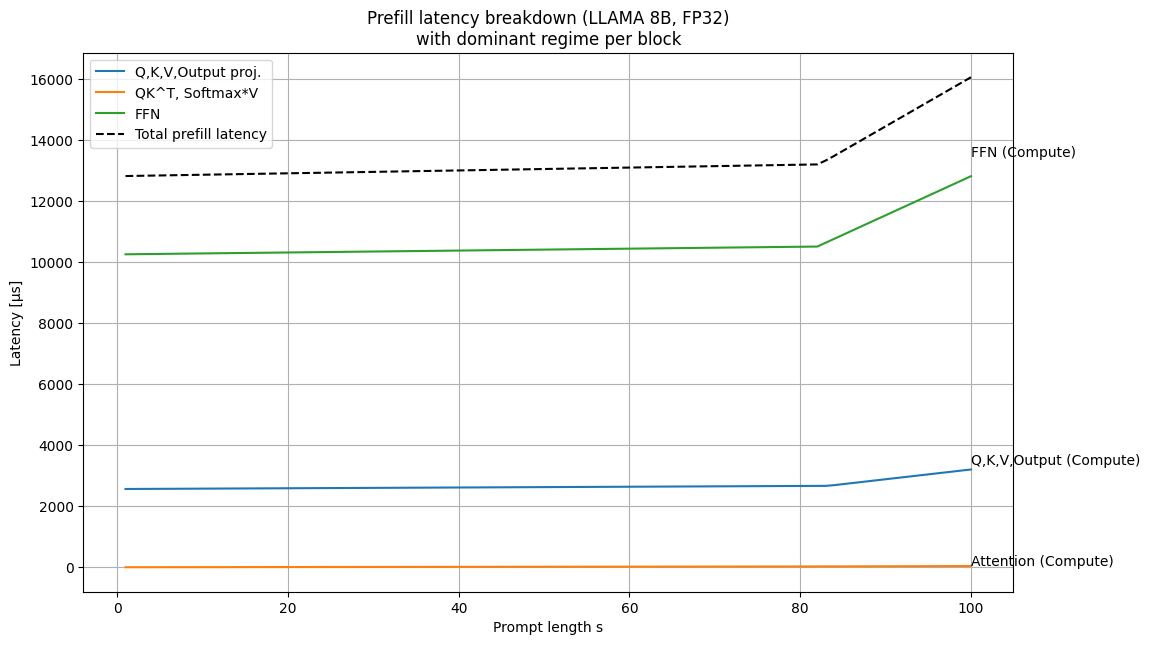

In [81]:
# Décomposer par famille et tracer compute vs memory pour chaque bloc

# 1) Q,K,V, Output
qkv_cmp = cmp_qkv
qkv_mem = mem_qkv

# 2) QK^T, Softmax*V
attn_cmp = cmp_attn
attn_mem = mem_attn

# 3) FFN
ffn_cmp = cmp_ffn
ffn_mem = mem_ffn

# Total par bloc (avec multiplicité)
qkv_total = 4 * np.stack([qkv_cmp, qkv_mem])
attn_total = 2 * np.stack([attn_cmp, attn_mem])
ffn_total = 4 * np.stack([ffn_cmp, ffn_mem])

# Total pondéré
qkv_total = np.maximum(qkv_total[0], qkv_total[1])
attn_total = np.maximum(attn_total[0], attn_total[1])
ffn_total = np.maximum(ffn_total[0], ffn_total[1])

# On multiplie par N
qkv_total *= N
attn_total *= N
ffn_total *= N

# Pour voir compute vs mem bound pour chaque bloc
qkv_bound = np.where(qkv_cmp > qkv_mem, 'Compute', 'Memory')
attn_bound = np.where(attn_cmp > attn_mem, 'Compute', 'Memory')
ffn_bound = np.where(ffn_cmp > ffn_mem, 'Compute', 'Memory')

# Plot
plt.figure(figsize=(12, 7))
plt.plot(s, qkv_total * 1e6, label='Q,K,V,Output proj.')
plt.plot(s, attn_total * 1e6, label='QK^T, Softmax*V')
plt.plot(s, ffn_total * 1e6, label='FFN')

# Annotate the dominant regime for each block
for i, name, bound in zip([qkv_total, attn_total, ffn_total],
                          ['Q,K,V,Output', 'Attention', 'FFN'],
                          [qkv_bound, attn_bound, ffn_bound]):
    idx = np.argmin(np.abs(s - 1500))  # pick a point to annotate
    plt.text(s[idx], i[idx] * 1e6 * 1.05,
             f'{name} ({bound[idx]})',
             fontsize=10)

plt.plot(s, (qkv_total + attn_total + ffn_total) * 1e6,
         label='Total prefill latency', linestyle='--', color='black')

plt.xlabel("Prompt length s")
plt.ylabel("Latency [µs]")
plt.title("Prefill latency breakdown (LLAMA 8B, FP32)\nwith dominant regime per block")
plt.legend()
plt.grid(True)
plt.show()


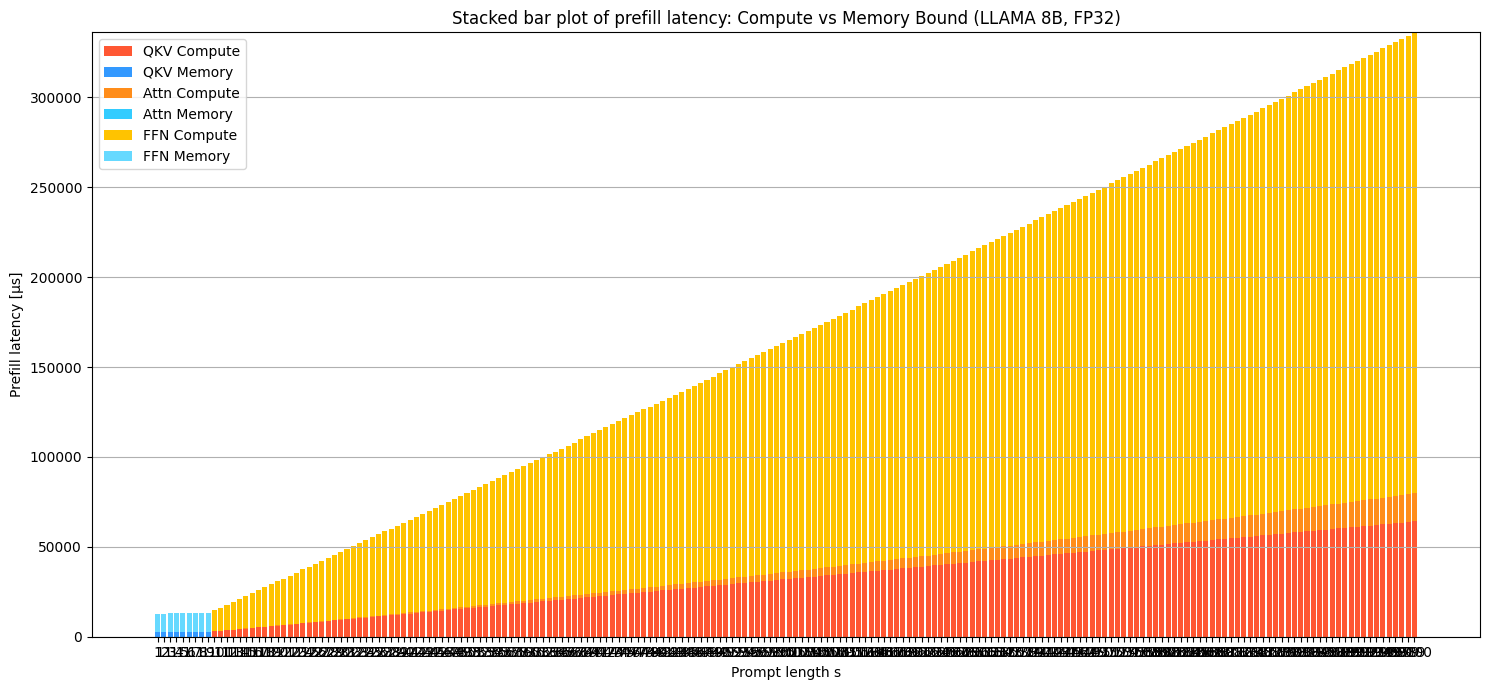

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Same constants
h = 4096
bw = 4  # bytes per weight, FP32
F_max = 6.7e13
B_max = 3.35e12
N = 32

# Fewer points for clearer bars
s = np.linspace(1, 2000, 200).astype(int)

# Compute terms
cmp_qkv = s * h**2 / F_max
mem_qkv = (2 * s * h + h**2) * bw / B_max

cmp_attn = s**2 * h / F_max
mem_attn = (s**2 + s * h) * bw / B_max

cmp_ffn = 4 * s * h**2 / F_max
mem_ffn = (5 * s * h + 4 * h**2) * bw / B_max

# Multiply by layer count and operation count
qkv_cmp_total = 4 * N * cmp_qkv
qkv_mem_total = 4 * N * mem_qkv

attn_cmp_total = 2 * N * cmp_attn
attn_mem_total = 2 * N * mem_attn

ffn_cmp_total = 4 * N * cmp_ffn
ffn_mem_total = 4 * N * mem_ffn

# Take whichever dominates
qkv_cmp_active = np.where(cmp_qkv > mem_qkv, qkv_cmp_total, 0)
qkv_mem_active = np.where(mem_qkv >= cmp_qkv, qkv_mem_total, 0)

attn_cmp_active = np.where(cmp_attn > mem_attn, attn_cmp_total, 0)
attn_mem_active = np.where(mem_attn >= cmp_attn, attn_mem_total, 0)

ffn_cmp_active = np.where(cmp_ffn > mem_ffn, ffn_cmp_total, 0)
ffn_mem_active = np.where(mem_ffn >= cmp_ffn, ffn_mem_total, 0)

# Bar plot with closer bars and nuanced colors
bar_width = 0.8
s_pos = np.arange(len(s))

fig, ax = plt.subplots(figsize=(15, 7))

p1 = ax.bar(s_pos, qkv_cmp_active * 1e6, bar_width, label='QKV Compute', color='#FF5733')  # reddish-orange
p2 = ax.bar(s_pos, qkv_mem_active * 1e6, bar_width, bottom=qkv_cmp_active * 1e6, label='QKV Memory', color='#3399FF')  # light blue

p3 = ax.bar(s_pos, attn_cmp_active * 1e6, bar_width, bottom=(qkv_cmp_active + qkv_mem_active) * 1e6, label='Attn Compute', color='#FF8D1A')  # orange
p4 = ax.bar(s_pos, attn_mem_active * 1e6, bar_width, bottom=(qkv_cmp_active + qkv_mem_active + attn_cmp_active) * 1e6, label='Attn Memory', color='#33CCFF')  # lighter blue

p5 = ax.bar(s_pos, ffn_cmp_active * 1e6, bar_width, bottom=(qkv_cmp_active + qkv_mem_active + attn_cmp_active + attn_mem_active) * 1e6, label='FFN Compute', color='#FFC300')  # yellow-orange
p6 = ax.bar(s_pos, ffn_mem_active * 1e6, bar_width, bottom=(qkv_cmp_active + qkv_mem_active + attn_cmp_active + attn_mem_active + ffn_cmp_active) * 1e6, label='FFN Memory', color='#66D9FF')  # sky blue

ax.set_xlabel('Prompt length s')
ax.set_ylabel('Prefill latency [µs]')
ax.set_title('Stacked bar plot of prefill latency: Compute vs Memory Bound (LLAMA 8B, FP32)')
ax.set_xticks(s_pos)
ax.set_xticklabels(s)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


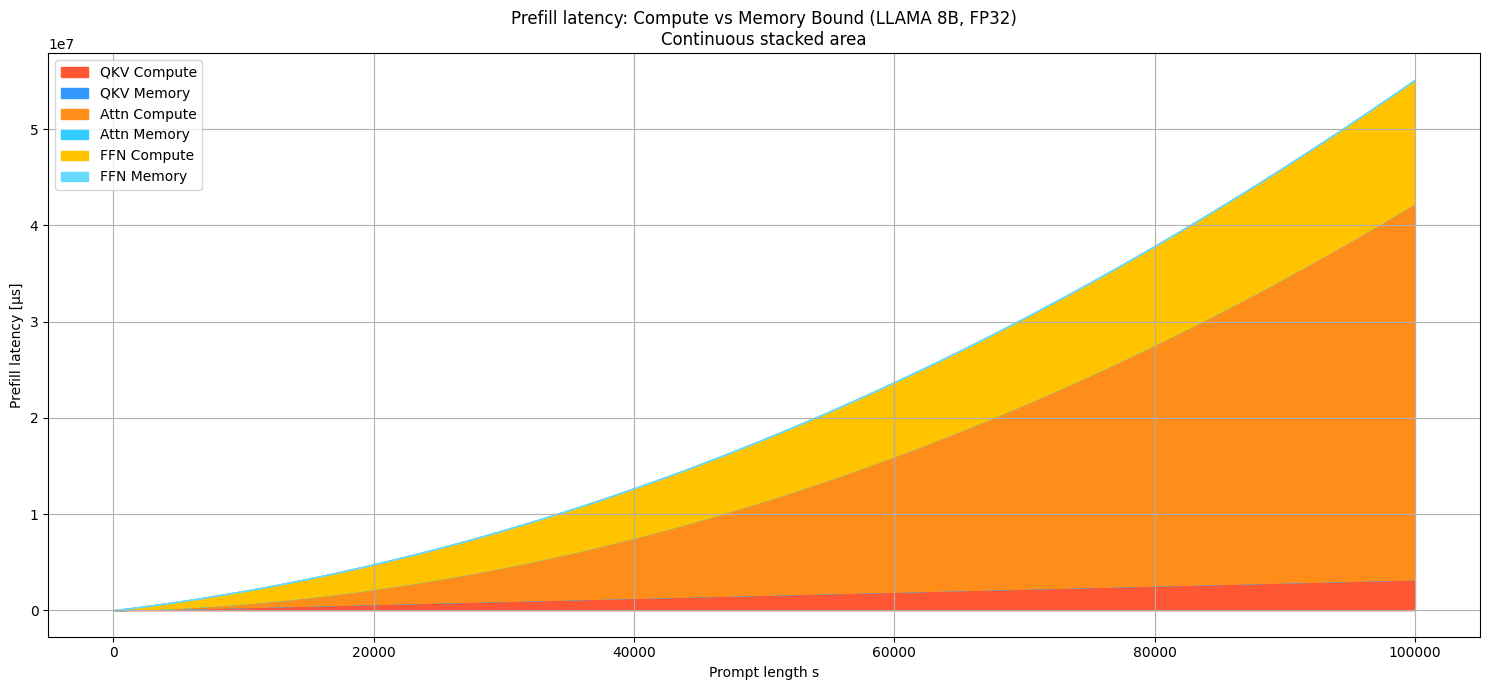

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Reprendre les paramètres
h = 4096
bw = 4  # bytes per weight
F_max = 6.7e13
B_max = 3.35e12
N = 32

# Plus de points pour un effet continu
s = np.linspace(1, 100_000, 100_000)

# Compute & memory times
cmp_qkv = s * h**2 / F_max
mem_qkv = (2 * s * h + h**2) * bw / B_max

cmp_attn = s**2 * h / F_max
mem_attn = (s**2 + s * h) * bw / B_max

cmp_ffn = 4 * s * h**2 / F_max
mem_ffn = (5 * s * h + 4 * h**2) * bw / B_max

# Totaux avec multiplicité
qkv_cmp_total = 4 * N * cmp_qkv
qkv_mem_total = 4 * N * mem_qkv
attn_cmp_total = 2 * N * cmp_attn
attn_mem_total = 2 * N * mem_attn
ffn_cmp_total = 4 * N * cmp_ffn
ffn_mem_total = 4 * N * mem_ffn

# Prendre seulement le mode dominant
qkv_cmp_active = np.where(cmp_qkv > mem_qkv, qkv_cmp_total, 0)
qkv_mem_active = np.where(mem_qkv >= cmp_qkv, qkv_mem_total, 0)

attn_cmp_active = np.where(cmp_attn > mem_attn, attn_cmp_total, 0)
attn_mem_active = np.where(mem_attn >= cmp_attn, attn_mem_total, 0)

ffn_cmp_active = np.where(cmp_ffn > mem_ffn, ffn_cmp_total, 0)
ffn_mem_active = np.where(mem_ffn >= cmp_ffn, ffn_mem_total, 0)

# Empiler pour une aire
y1 = qkv_cmp_active * 1e6
y2 = y1 + qkv_mem_active * 1e6
y3 = y2 + attn_cmp_active * 1e6
y4 = y3 + attn_mem_active * 1e6
y5 = y4 + ffn_cmp_active * 1e6
y6 = y5 + ffn_mem_active * 1e6

# Tracer l'aire sous la courbe
fig, ax = plt.subplots(figsize=(15, 7))
ax.fill_between(s, 0, y1, label='QKV Compute', color='#FF5733')
ax.fill_between(s, y1, y2, label='QKV Memory', color='#3399FF')
ax.fill_between(s, y2, y3, label='Attn Compute', color='#FF8D1A')
ax.fill_between(s, y3, y4, label='Attn Memory', color='#33CCFF')
ax.fill_between(s, y4, y5, label='FFN Compute', color='#FFC300')
ax.fill_between(s, y5, y6, label='FFN Memory', color='#66D9FF')

ax.set_xlabel('Prompt length s')
ax.set_ylabel('Prefill latency [µs]')
ax.set_title('Prefill latency: Compute vs Memory Bound (LLAMA 8B, FP32)\nContinuous stacked area')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


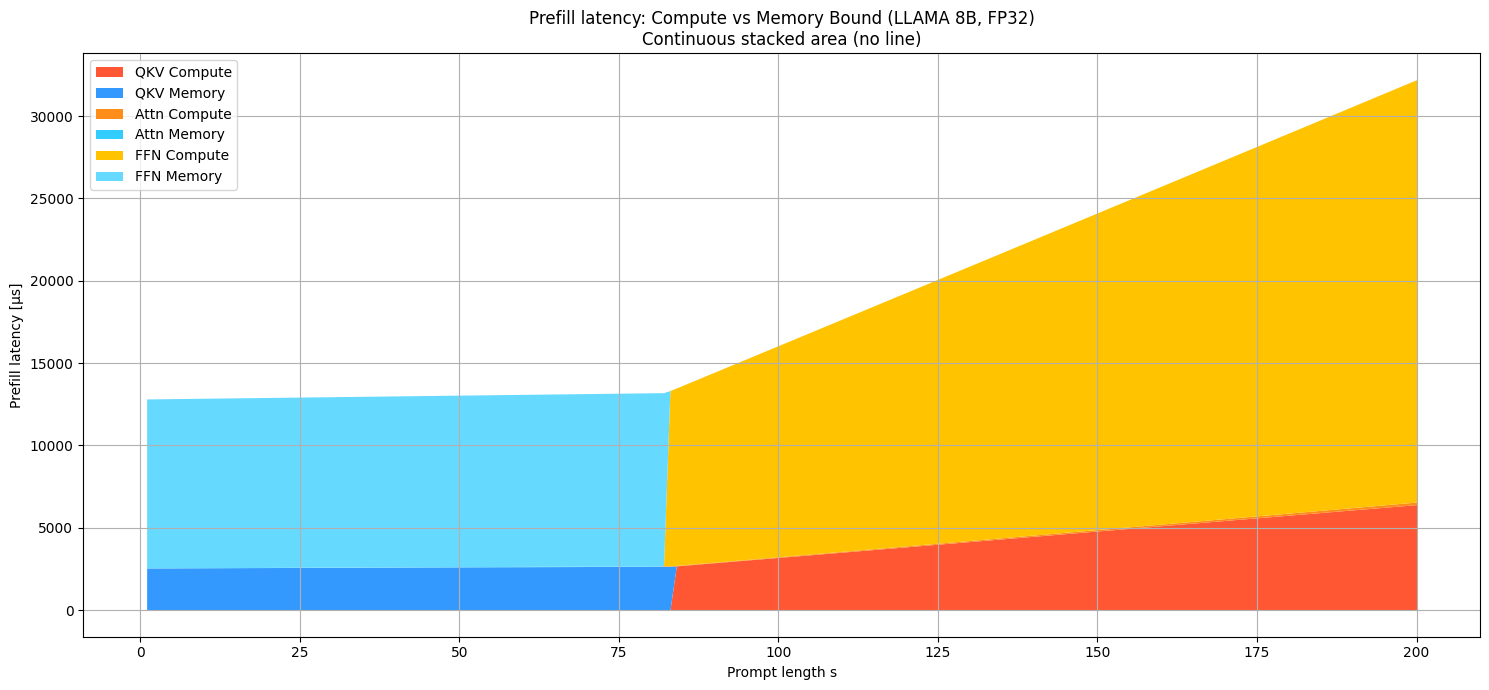

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Même setup
h = 4096
bw = 4
F_max = 6.7e13
B_max = 3.35e12
N = 32

s = np.linspace(1, 200 , 200)

cmp_qkv = s * h**2 / F_max
mem_qkv = (2 * s * h + h**2) * bw / B_max

cmp_attn = s**2 * h / F_max
mem_attn = (s**2 + s * h) * bw / B_max

cmp_ffn = 4 * s * h**2 / F_max
mem_ffn = (5 * s * h + 4 * h**2) * bw / B_max

qkv_cmp_total = 4 * N * cmp_qkv
qkv_mem_total = 4 * N * mem_qkv
attn_cmp_total = 2 * N * cmp_attn
attn_mem_total = 2 * N * mem_attn
ffn_cmp_total = 4 * N * cmp_ffn
ffn_mem_total = 4 * N * mem_ffn

qkv_cmp_active = np.where(cmp_qkv > mem_qkv, qkv_cmp_total, 0)
qkv_mem_active = np.where(mem_qkv >= cmp_qkv, qkv_mem_total, 0)

attn_cmp_active = np.where(cmp_attn > mem_attn, attn_cmp_total, 0)
attn_mem_active = np.where(mem_attn >= cmp_attn, attn_mem_total, 0)

ffn_cmp_active = np.where(cmp_ffn > mem_ffn, ffn_cmp_total, 0)
ffn_mem_active = np.where(mem_ffn >= cmp_ffn, ffn_mem_total, 0)

y1 = qkv_cmp_active * 1e6
y2 = y1 + qkv_mem_active * 1e6
y3 = y2 + attn_cmp_active * 1e6
y4 = y3 + attn_mem_active * 1e6
y5 = y4 + ffn_cmp_active * 1e6
y6 = y5 + ffn_mem_active * 1e6

fig, ax = plt.subplots(figsize=(15, 7))
ax.fill_between(s, 0, y1, label='QKV Compute', color='#FF5733', linewidth=0)
ax.fill_between(s, y1, y2, label='QKV Memory', color='#3399FF', linewidth=0)
ax.fill_between(s, y2, y3, label='Attn Compute', color='#FF8D1A', linewidth=0)
ax.fill_between(s, y3, y4, label='Attn Memory', color='#33CCFF', linewidth=0)
ax.fill_between(s, y4, y5, label='FFN Compute', color='#FFC300', linewidth=0)
ax.fill_between(s, y5, y6, label='FFN Memory', color='#66D9FF', linewidth=0)

ax.set_xlabel('Prompt length s')
ax.set_ylabel('Prefill latency [µs]')
ax.set_title('Prefill latency: Compute vs Memory Bound (LLAMA 8B, FP32)\nContinuous stacked area (no line)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [95]:
# $\displaystyle s^{\star} = \frac{h (\frac{b_{\mathrm{w}} B_{\max}}
b_w = 4  # bytes per weight, FP32
h = 4096  # hidden size
F_max = 6.7e13  # FLOP/s (67 TFLOPS)
B_max = 3.35e12  # Bytes/s (3.35 TB/s
s = h * (b_w * B_max) / (F_max * h**2 + 2 * b_w * B_max)
s

4.882812383584681e-05

In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp4_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp4_df = pd.concat(dfs, ignore_index=True)
exp4_df['energy_generate_gpu'] = exp4_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp4_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp4_df['runs'] = 5
exp4_df['cpu_count'] = 8
exp4_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp4_df['gpu_count'] = 1
exp4_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'


exp4_df

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,negative_prompt,height,width,num_frames,steps,...,out_csv,fps,warmup,output_path,name_csv,energy_generate_gpu,cpu_count,cpu_model,gpu_count,gpu_model
0,WAN2.1-T2V-14B-Diffusers,1898.443419,0.045305,0.020042,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,81,8,...,exp4_WAN2.1-T2V-14B-Diffusers_720p_results_pro...,15,1,/fsx/jdelavande/benchlab/videos/data,exp4_WAN2.1-T2V-14B-Diffusers_720p_results_pro...,0.364876,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,WAN2.1-T2V-14B-Diffusers,485.509023,0.011430,0.005127,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",480,832,81,8,...,exp4_WAN2.1-T2V-14B-Diffusers_480p_results_pro...,15,1,/fsx/jdelavande/benchlab/videos/data,exp4_WAN2.1-T2V-14B-Diffusers_480p_results_pro...,0.093068,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
